In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn import model_selection, linear_model

In [4]:
membership_df = pd.read_csv("/Users/miranda/Desktop/497-proj/Membership_Updated.csv")

age_df = membership_df["Age"]
total_donation_df = membership_df['Total Donation Amount']
gender_df = membership_df["Gender"].loc[membership_df["Gender"] != 'Unknown']

age_donation_df = pd.concat([age_df, total_donation_df], axis=1).loc[age_df > 20]
gender_breakdown_df = pd.concat([age_donation_df, gender_df], axis=1)

g_moneycap_filter10_df = gender_breakdown_df.loc[gender_breakdown_df['Total Donation Amount'] < 10000]
g_moneycap_filter1_df = gender_breakdown_df.loc[gender_breakdown_df['Total Donation Amount'] < 100]

moneycap_filter_clean = g_moneycap_filter10_df.loc[age_donation_df['Total Donation Amount'] != 0]


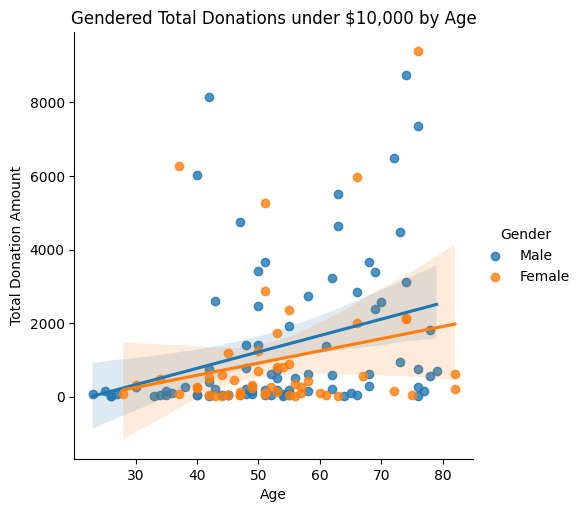

In [5]:
sns.lmplot(x='Age', y='Total Donation Amount', hue="Gender", data=moneycap_filter_clean).set(title='Gendered Total Donations under $10,000 by Age')

In [12]:
X= moneycap_filter_clean['Gender']
y=moneycap_filter_clean['Total Donation Amount']

X = pd.get_dummies(data=X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
xval = model_selection.KFold(10, shuffle=True)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

results = model_selection.cross_validate(regressor, X,y, cv=xval, scoring='r2', return_train_score =True)
train_r2 = results['train_score'].mean() 
train_std = results['train_score'].std() 
test_r2 = results['test_score'].mean()
test_std = results['test_score'].std()

print('train_r2 mean:', train_r2)
print('train_std', train_std)
print('test_r2', test_r2)
print('test_std',test_std)


train_r2 mean: 0.009261781686408621
train_std 0.007313240458336308
test_r2 -0.2546099982835496
test_std 0.4038204638754212


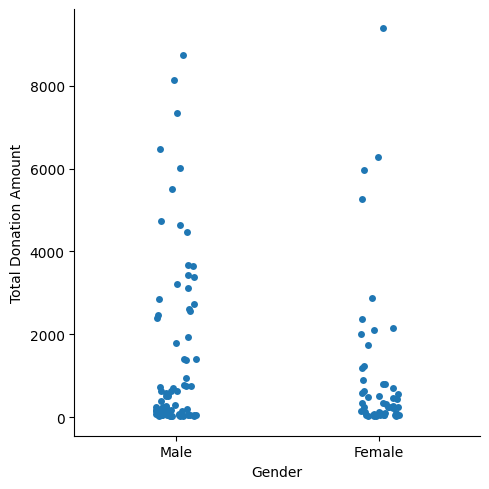

In [13]:
sns.catplot(data=moneycap_filter_clean, x="Gender", y="Total Donation Amount")